# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цели исследования:** \
    -найти интересные особенности и зависимости, которые существуют на рынке недвижимости. \
    -определить ключевые факторы, влияющие на рынучную стоимость квартир \
    -изучить предложение квартир по локации. \
    
**Ход исследования:** \
    1. *Иморт данных  из файла '/datasets/real_estate_data.csv' и ознакомления с ними, оценим количество пропусков и качество предоставленных данных* \
    2.*Предобработка данных* \
    3.*Добавлени новых столбцов  в таблицу (цена одного квадратного метра, день недели публикации объявления, год и месяц публикаций, типизация этажей)*\
    4.*Исследовательский анализ данных*\
        -Изучение параметров объектов\
        -Изучение скорости продажи квартиры\
        -Определить факторы влияющие на общую стоимость объектов\
        -Посчитать среднюю стоимость кв. м. в топ-10 населенных пунктах\
        -Средняя стоимость жилья в зависимости от близости к центру\
    5.*Написание общего вывода*\
    
    
   

# 1.Откройте файл с данными и изучите общую информацию

In [ ]:
#импортируем библиотеку
import pandas as pd

In [ ]:
#прочитаем файл
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [ ]:
#выведем первые 10 строк для ознакомления
data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
#посмотрим общую информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице видим довольно много пропусков, возможно это человеческий фактор и отсутствие данных по некоторым критериям, но также это могут быть технологические ошибки.
Также заметно не соответствие типов данных в некоторых столбцах. Например столбцы **floors_total, balcony, parks_around3000, ponds_around3000** и **days_exposition** должны быть целочисленными (int), **is_apartment** - bool, а **first_day_exposition** - datetime.

In [ ]:
#выведем общую описательную информацию датафрейма методом describe() и гистограммамы
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


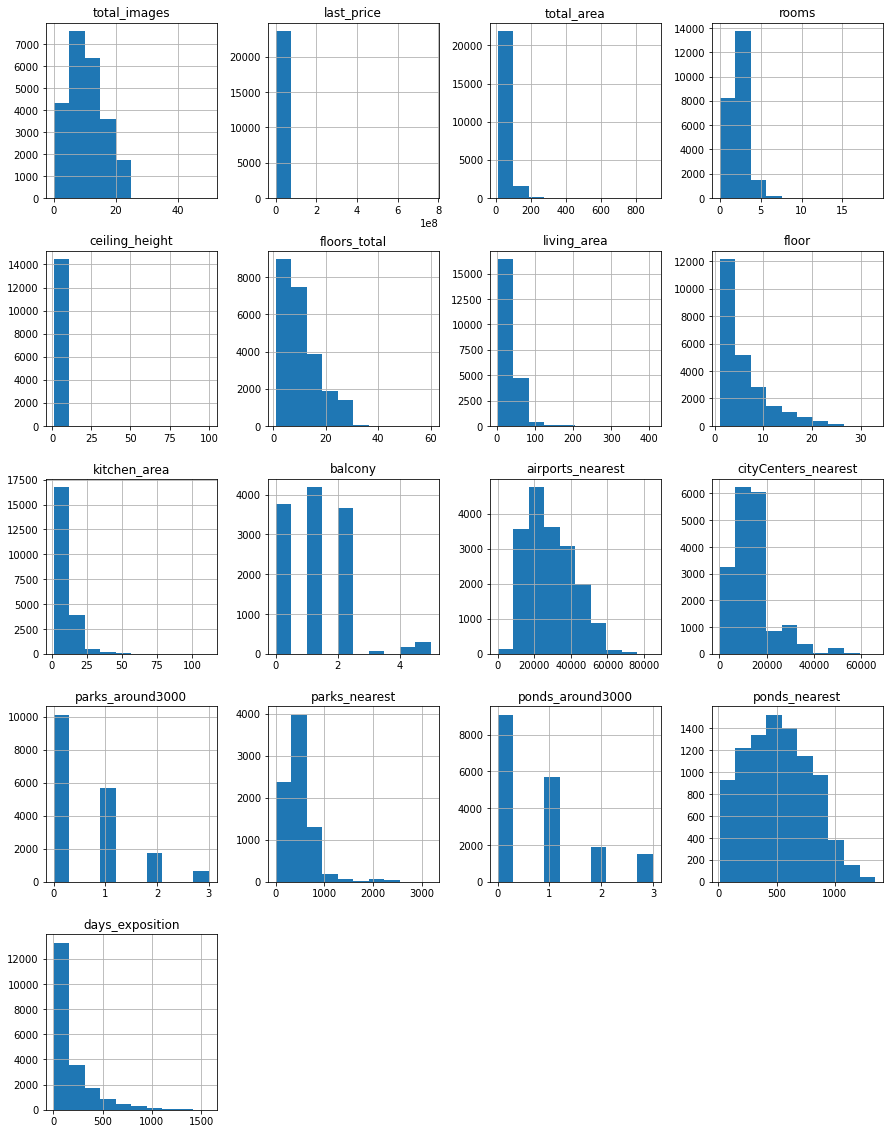

In [ ]:
data.hist(figsize=(15,20));

**`Вывод:`** \
Всего у нас 23699 записи и 22 столбца.
Для  ряда столбцов есть пропущенные значения и некорректный тип данных.Будем  заменять тип данных и анализировать пропуски. \
В некоторых столбцах есть аномальные значения (например потолки 100м, 19-ти комнатные квартиры, жилая площать в 2 кв м или мин.   стоимость квартиры),на это обратим внимание при дальнейшем анализе. \
Также приведем названия столбцов к единому стилю.


# 2. Выполните предобработку данных

# **```2.1 Найдите и изучите пропущенные значения в столбцах```**



In [ ]:
#Приведем названия столбцов к единому стилю
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                            'parks_around3000': 'parks_around_3000',
                            'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Изучим и обработаем пропуски**

In [ ]:
# еще раз выведем количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски наблюдаем в следующих столбцах:

`ceiling_height (высота потолков)` - 9195 пропусков, пропусков около 40%(более трети в таблице).Данные этого столбца для исследования могут пригодиться, рассмотрим детальнее, возможно подойдет для замены медианное значение \
`floors_total (кол-во этажей дома)` - 86 пропусков, пропусков мало, на результат исследование не сильно повлияет, удалим строки \
`living_area (жилая площадь)` - 1903 пропуска, это около 10%. Не смотря на то, что эти данные нам нужны для анализа, заполнить их нечем, скорей всего оставим как есть \
`kitchen_area (площадь кухни)` -  2278 пропусков,пропусков около 10%, но эти данные нам пригодятся для дальнейшего анализа. Возможно пользователи не знали точного метража кухни или есть иные причины не указывать.Заполнить пропуски нечем, скорей всего оставим как есть \
`is_apartment (апартаменты)` - 20924 пропусков. Возможно, пользователи не разобрались в типе неджимости "апартаменты" и не указал отрицательное значение.Поскольку в этом столбце булев тип данных, пропуски можно заменить на False.\
`balcony (число балконов)` - 11519 пропусков, скорей всего при отсутствии балконо в пользователи оставили это значение пропущенным, пропуски можем заменить на 0 \
`locality_name (название населённого пункта)` - 49 пропусков, заменить нам прощенные значения нечем, на исследование такое количество пропусков не сильно повлияет(большая выборка остается), удалим строки\
`airports_nearest (расстояние до аэропорта)` - 5542 пропуска, возможно возникли изза отсутствия данных на картах, оставим пропуски \
`city_сenters_nearest (расстояние до центра города)` - 5519 пропусков, также вероятно возникли изза отсутствия данных с карт, оставляем \
`У parks_around_3000 (число парков в радиусе 3 км)  и ponds_around_3000 (число водоёмов в радиусе 3 км)` - 5518 пропусков, значения совпадают. Это взяимосвязь подозрительна, но вероятно автоматически не получилось подгрузить данные из карт, информация не повлияет на текущее исследование, скорей всего заменим на нулевое значение \
`parks_nearest (расстояние до парка)` - 15620 пропусков, более половины. Возможно данные не были получены, но эта информация не повлияет на исследования, оставим пропуски \
`ponds_nearest (расстояние до водоёма)` - 14589 пропусков. Пропусков много, но они не повлияют на исследование, можем их оставить \
`days_exposition (сколько дней размещено объявление)` - 3181 пропусков. Возможно это ошибка имеет технический характер, поскольку эти данные получаются автоматически, или данные еще не получены( квартира на продаже).Данные этого столбца нам пригодятся, но заполнить их сложно, оставим как есть

In [ ]:
#заменим пропущенные значения в столце 'is_apartment' на False и проверяем
data['is_apartment'].fillna(False, inplace=True)


In [ ]:
#заменим пропущенные значения в столце 'balcony' на  0
data['balcony'].fillna(0, inplace=True)


Посмотрим  и сравним медианное значение высоты потолков `ceiling_height` с имеющимися данными и при условии, что потолки не ниже 2.4 и не  выше 8 метров


In [ ]:
#посмотрим количество ошибоно заполненых аномальных данных высоты потолка (минимальных и максимальных)
data_unusual_ceiling_min = data.query('ceiling_height <2.4')
data_unusual_ceiling_max = data.query('ceiling_height > 8')
print('Количество строк с минимальной высотой потолка:', data_unusual_ceiling_min['ceiling_height'].count())
print('Количество строк с минимальной высотой потолка:', data_unusual_ceiling_max['ceiling_height'].count())
#взаимосвязи в этих данных нет, вероятно и правда это случайная ошибка ввода  в 26 колонках

Количество строк с минимальной высотой потолка: 21
Количество строк с минимальной высотой потолка: 26


In [ ]:
#выведем описание сырых и отфильтрованных данных

print (data['ceiling_height'].describe())
print ()
data_normal_ceiling = data.query('ceiling_height < 8 and ceiling_height >= 2.4')
print (data_normal_ceiling['ceiling_height'].describe())


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

count    14454.000000
mean         2.727562
std          0.277984
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64


**Медианное (2.65м) значение не изменилось, заменим пропуски им**

In [ ]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].isna().sum()

0

In [ ]:
#заменим пропуски в данных по количеству парков и озер нулями, возможно они отсутствуютили данные не были определены
#а также сразу заменим тип данных на 'int'
data['parks_around_3000'] = data['parks_around_3000'].fillna(value=0).astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value=0).astype(int)


Попробуем выяснить причину и взяимосвязь пропусков в столбцах *`'kitchen_area'`* и *`'living_area'`*  и заменить пропуски в строках.
Возможная причина пропусков  человеческий фактор, продавец забыл указать или решил указать только  общую площадь.
Квартиры студии в таблице с количеством комнат  - 0 , так в них не выделяю отдельно пространство под кухню и жилое помещение в общем метраже.  Для начала посмотрим взаимосвязь наличия пропусков с количеством квартир-студий

In [ ]:
#посмотрим сколько всего студий в нашей таблице
print('Всего квартир с типом Студия:',data['studio'].sum())
print()
#посмотрим данные по срезу где тип квартиры студия и пропущены значения  в столбцах 'kitchen_area'и 'living_area'
print(data.query('studio == True')[['kitchen_area', 'living_area']].isnull().sum())
print()
#посмотрим данные по срезу где казано 0 комнат и пропущены значения  в столбцах 'kitchen_area'и 'living_area'
print(data.query('rooms==0')[['kitchen_area', 'living_area']].isnull().sum())
#также выведем  количество пропущеных значения  в столбцах 'kitchen_area'и 'living_area' пр условии, 0 комнат и квартира -студия
data.query('studio == True & rooms==0')[['kitchen_area', 'living_area']].isnull().sum()

Всего квартир с типом Студия: 149

kitchen_area    149
living_area      10
dtype: int64

kitchen_area    197
living_area      14
dtype: int64


kitchen_area    138
living_area      10
dtype: int64

**Всего квартир студий - 146, количество строк  со значение rooms ноль - 194, а строк, где studio == True и rooms == 0 - 135**

**Количество пропусков, которые приходятся на *`studio`* в столбцах *`'kitchen_area'`* и *`'living_area'`*  слишком  мало относительно количества пропущенных значений, вероятно ошибка пропусков кроется глубже.**

In [ ]:
#c помощью метода корреляции посмотрим взаимосвязь 'kitchen_area' и 'living_area'
correlation_data= data.corr()
print(correlation_data.sort_values(by='kitchen_area', ascending=False)['kitchen_area'].head())
print()
correlation_data.sort_values(by='living_area', ascending=False)['living_area'].head()

kitchen_area    1.000000
total_area      0.609121
last_price      0.519869
living_area     0.428674
rooms           0.269945
Name: kitchen_area, dtype: float64



living_area     1.000000
total_area      0.939537
rooms           0.845977
last_price      0.566492
kitchen_area    0.428674
Name: living_area, dtype: float64

**Наибольшее значение корелляции у обоих столбцов с общей площадью (total_area). \
Чтобы заполнить пропуски в *`'kitchen_area'`* и *`'living_area'`*, можно было бы использовать медианное значение, но оно не достаточно точное, поскольку есть выбросы. Предлагаю данные оставить в том виде что есть.**

In [ ]:
#удалим строки где пропусков мало ( отсутствует локация и этажность)
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
#gjvvjnhbv оставшиеся пропущенные значения
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

# ***```2.2 Рассмотрите типы данных в каждом столбце```***


Ранее уже отмечали. что типы данных в некоторых столбцах не соответствуют \
*`floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition`* - должны быть целочисленными (int), \
*`is_apartment`* - bool, \
*`first_day_exposition`* - datetime



In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data[['floors_total', 'balcony']] = data[['floors_total', 'balcony']].apply(lambda x: x.astype('int64'))

In [ ]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int64
parks_nearest                  float64
ponds_around_3000                int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Во всех столбцах кроме 'days_exposition' произвели заменуб поскольку в столбце 'days_exposition' оставили пропущенные значения, тип данных изменить не получится.


# **```2.3 Изучите уникальные значения в столбце locality_name с названиями и устраните неявные дубликаты.```**


In [ ]:
# проверим таблицу на явные  дубликаты и выведем их сумму
data.duplicated().sum()

0

*Теперь займемся поиском и обработкой неявных дубликатов в столбце *`locality_name`**

In [ ]:
#посмотрим общее количество уникальных значений в столбце и выведем эти значения
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].unique()



Количество уникальных значений: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
#с помощью replace привем дублирующие названия к одному варианту
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е').replace('поселок Мурино', 'Мурино').replace('деревня Кудрово','Кудрово')
    .replace(['городской посёлок', 'городской поселок'], 'поселок городского типа',regex=True)
)


In [ ]:
#выведем количество ункальных значений после замены
data['locality_name'].nunique()


321

**Общий вывод:** \
Провели обработку данных, по результам  достигли следующего: \
-Заполнили все возможные пропуски значений и переименовали столбцы\
-изменили тип данных\
-нашли неявные дубликаты и заменили их\
Часть нужных для анализа данных  в таблице отсутствует и возможно следует сообщить об этом ответственным по выгрузке \ сотрудникам, чтобы обратить внимание и выяснить точную причину.

# 3. Добавьте в таблицу новые столбцы

цена одного квадратного метра  - **price_square_meter** (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);\
день недели публикации объявления - **exposition_weekday** (0 — понедельник, 1 — вторник и так далее);\
месяц публикации объявления - **exposition_month**;\
год публикации объявления- **exposition_year**;\
тип этажа квартиры  - **floor_category**(значения — «‎первый», «последний», «другой»);\
расстояние до центра города в километрах - **city_centers_nearest_km** (переведите из м в км и округлите до ближайших целых значений).\

In [ ]:
#добавим столбец и округлм его значения до двух знаков
data['price_square_meter'] = round((data['last_price'] / data['total_area']), 1)

In [ ]:
#добавим стоблцы с днем недели, месяце и годом
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year


In [ ]:
#Добавим столбец с типом этажей, для этого потрубется функция
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(get_floor_type, axis=1)


In [ ]:
#проверим функцию
data['floor_category'].sample(5)

11344    другой
2831     первый
2249     другой
9746     первый
14849    другой
Name: floor_category, dtype: object

In [ ]:
#добавим столбец с расстоянием от центра города в км и округляем
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
#выведем рандомные 5 строк и посмотри как добавились столцы
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
9592,8,6290000.0,62.0,2016-05-04,1,2.77,25,18.0,17,False,...,477.0,3,337.0,60.0,101451.6,2,5,2016,другой,16.0
23090,1,5960000.0,56.0,2019-02-24,2,2.75,23,32.0,21,False,...,447.0,1,71.0,NaN,106428.6,6,2,2019,другой,14.0
13195,20,14500000.0,93.2,2018-07-10,3,2.80,16,NaN,8,False,...,585.0,1,138.0,90.0,155579.4,1,7,2018,другой,16.0
12296,6,3865000.0,31.2,2018-06-16,1,2.80,14,15.0,6,False,...,NaN,0,NaN,5.0,123878.2,5,6,2018,другой,NaN
16287,9,3900000.0,28.6,2018-03-30,1,2.77,5,16.1,1,False,...,NaN,0,NaN,375.0,136363.6,4,3,2018,первый,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23565 non-null  int64         
 1   last_price               23565 non-null  float64       
 2   total_area               23565 non-null  float64       
 3   first_day_exposition     23565 non-null  datetime64[ns]
 4   rooms                    23565 non-null  int64         
 5   ceiling_height           23565 non-null  float64       
 6   floors_total             23565 non-null  int64         
 7   living_area              21700 non-null  float64       
 8   floor                    23565 non-null  int64         
 9   is_apartment             23565 non-null  bool          
 10  studio                   23565 non-null  bool          
 11  open_plan                23565 non-null  bool          
 12  kitchen_area             21343 n

**Вывод:**\
Добавили необходимые столцы, следует ометить,что в столбце `city_centers_nearest_km` присутствуют пропущенные значения, поскольку после обработки данных у нас были не все значения**

# 4.Проведите исследовательский анализ данных

# 4.1 **Изучение параметров объектов недвижимости**

***Общая площадь**

In [ ]:
# посмотрим  числовое описание данных методом describe()
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

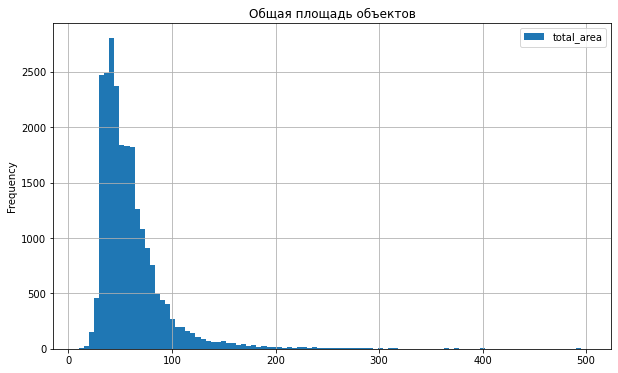

In [ ]:
#построим гистограмму для 'total_area'
data.plot(y='total_area',kind='hist',bins=100, grid=True,figsize=(10,6),range=(10,500),title='Общая площадь объектов');



В описательных данных видны выбросы. Построив гистограмму, видим, что количество объектов недвижимости со значение ниже 20м2 и  выше ~120м2 существенно мало, поэтому предложу отсечь эти значени для проведения анализа.

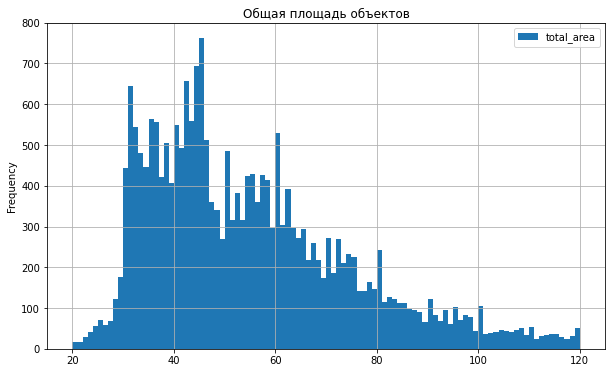

In [ ]:
#создадим переменную и создадим срез данных
total_area_good = data.query('total_area >= 20 & total_area <= 120')
total_area_good.plot(y='total_area',kind='hist',bins=100, grid=True,figsize=(10,6),range=(20,120),
                     title='Общая площадь объектов');

Рассматривая гистограмму без выбросов можно сказать, что большенство вариантов от 30м2 до 65м2. Объекты с меньшей и большей площадью тоже встречаются, но реже.

***Жилая площадь**

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


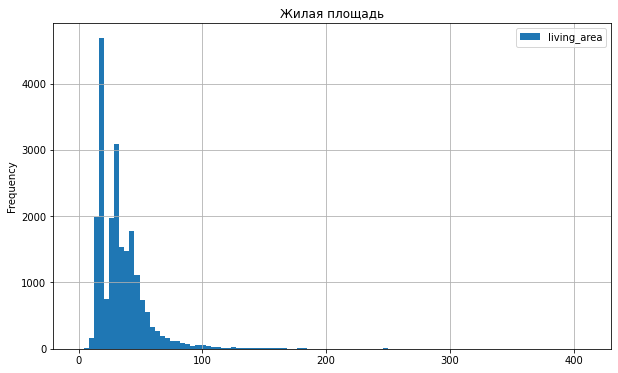

In [ ]:
# посмотрим описание данных методом describe()
print(data['living_area'].describe())

#построим гистограмму для 'living_area'
data.plot(y='living_area',kind='hist',bins=100, grid=True,figsize=(10,6),range=(0,410),title='Жилая площадь');


Согласно описательным данным мы имеем выбросы максимальной жилой площади, возможно ошибка в данных как и с общей площаью квартиры, посмотрим на данные без аномальных значений(более 80м2)

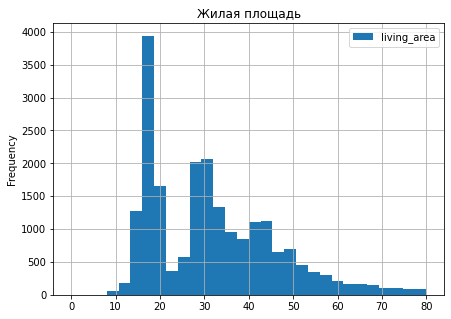

In [ ]:
living_area_good = data.query('living_area<= 80')
living_area_good.plot(y='living_area',kind='hist',bins=30, grid=True,figsize=(7,5),range=(0,80),title='Жилая площадь');

По отфильтрованным данным мы видим, что большая часть объявлений с жилой площадью от 15м2 до 35м2. Причем довольно большое количество квартир до 20м2, возможно это квартиры студи, апартаменты и квартиры с открытым планом. В варианты с жилой площадью более 35м2  тоже имеются но идут на уменьшение.

***Площадь кухни**

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


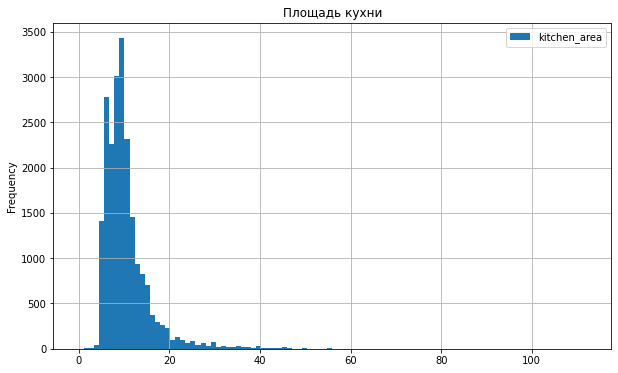

In [ ]:
# посмотрим описание данных методом describe()
print(data['kitchen_area'].describe())

#построим гистограмму для 'kitchen_area'
data.plot(y='kitchen_area',kind='hist',bins=100, grid=True,figsize=(10,6),range=(0,112),title='Площадь кухни');


По данным видим, что площадь кухни 112кв.м. аномальная величина, рассмотри данные с отфильтрованными значениями площади -не менее 5 м2 и не более 20м2

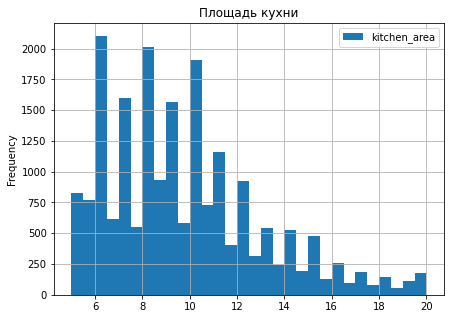

In [ ]:
kitchen_area_good = data.query('kitchen_area >= 5 & kitchen_area<= 20')
kitchen_area_good.plot(y='kitchen_area',kind='hist',bins=30, grid=True,figsize=(7,5),range=(5,20),title='Площадь кухни');

Изучив данные видим, что большая часть объектов имеет площать кухни от 5,5 м2 до 12м2. Наблюдается небольшой хвост из-за больших, но не часто встречающихся значений

***Цена объекта**

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


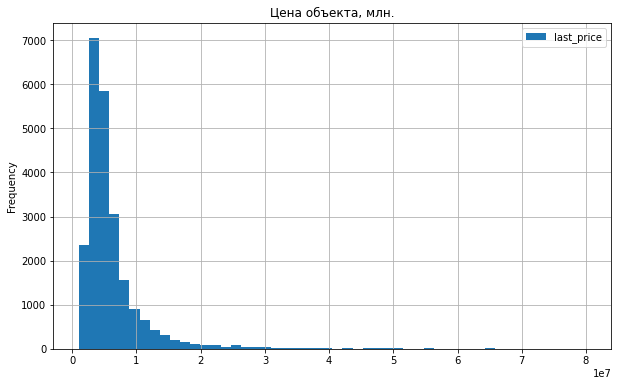

In [ ]:
# посмотрим описание данных методом describe()
print(data['last_price'].describe())

#построим гистограмму для 'last_pice'
data.plot(y='last_price',kind='hist',bins=50, grid=True,figsize=(10,6),range=(1000000,80000000),title='Цена объекта, млн.');


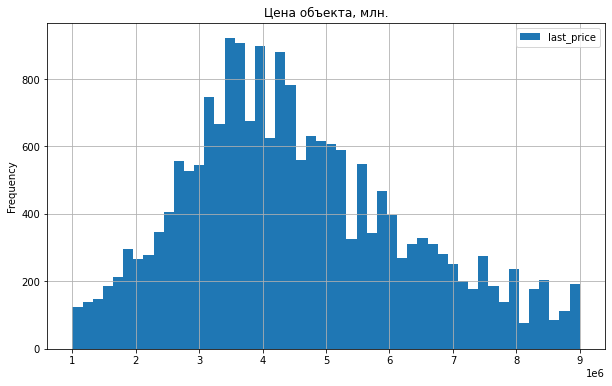

In [ ]:
last_price_good= data.query('last_price >= 1000000 & last_price <= 9000000')
last_price_good.plot(y='last_price',kind='hist',bins=50, grid=True,figsize=(10,6),range=(1000000,9000000),
                     title='Цена объекта, млн.');


По рассмотренным данным можно сказать что наибольшее количество предложеннх объектов недвижимости находятся в диапозоне 3,5 - 4,8 млн.рублей. Но в целом диапозон цен можно рассматриватьот 2,5 млн.руб до 6 млн.руб.

***Количество комнат**

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


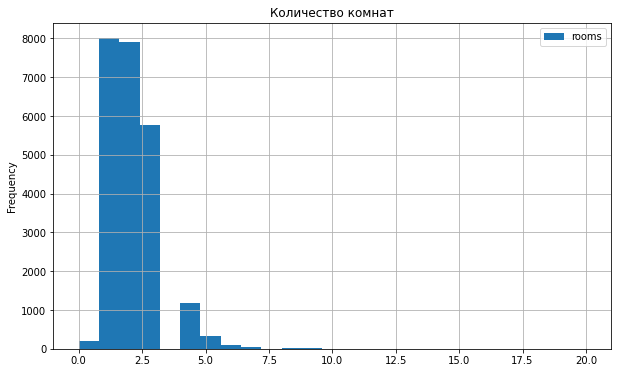

In [ ]:
# посмотрим описание данных методом describe()
print(data['rooms'].describe())

#построим гистограмму для 'rooms'
data.plot(y='rooms',kind='hist',bins=25, grid=True,figsize=(10,6),range=(0,20),title='Количество комнат');

По описательным данным видим, что есть выбросы -  квартиры с более чем 5ю комнатами редкость и возможно это либо отдельный дом \танхаус, либо ошибка \
Рассмотрим данные в срезе - не более 6 комнат

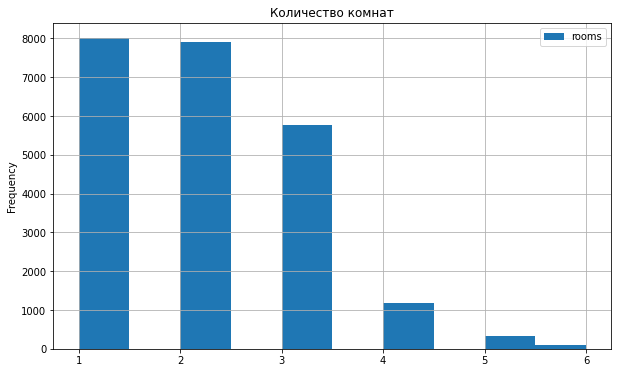

In [ ]:
rooms_good_data = data.query('rooms >= 1 & rooms<= 6')
rooms_good_data.plot(y='rooms',kind='hist',bins=10, grid=True,figsize=(10,6),range=(1,6),title='Количество комнат');

По гистограмме видим, что наиболее часто встречается жилье  1-3 комнатами, обектоы с большим количеством комнат( от 3 до 5) встречаются реже.

***Высота потолков**

In [ ]:
# посмотрим описание данных методом describe(), мы уже знакомились ближе с этими данными
print(data['ceiling_height'].describe())


count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


Ранее мы уже сталкивались с этими данными и знаем, что есть аномальные данные в высоте потолков. Сразу отфильтруем  данные и представим в срезе от 2,4м до 3 м

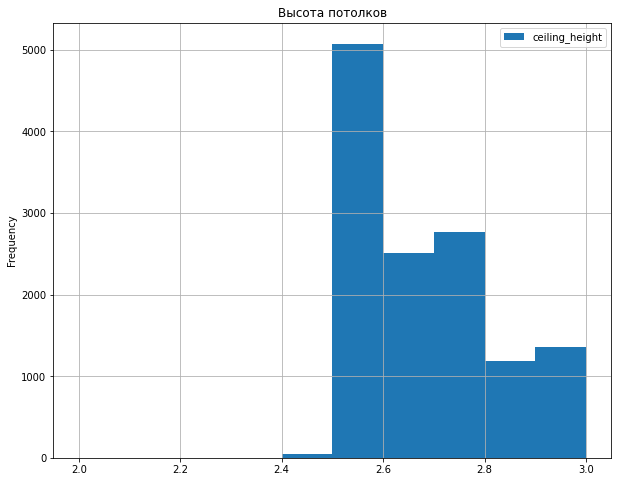

In [ ]:
#ранее мы уже создавали переменную со срезом данных высоты потолков -data_normal_ceiling,
#используем ее для постороения гистограммы
data_normal_ceiling.plot(y='ceiling_height',kind='hist',bins=10, grid=True,figsize=(10,8),
                         range=(2,3),title='Высота потолков');

Исключая аномалии и выбросы, наблюдаем что большинство объектов недвижимости имеют высоту потолков от 2,5 до 2,8 метров.

***Тип этажа квартиры**

In [ ]:
# посмотрим данные в столбце floor_category(который мы ранее добавили) методом value_counts()
data['floor_category'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floor_category, dtype: int64

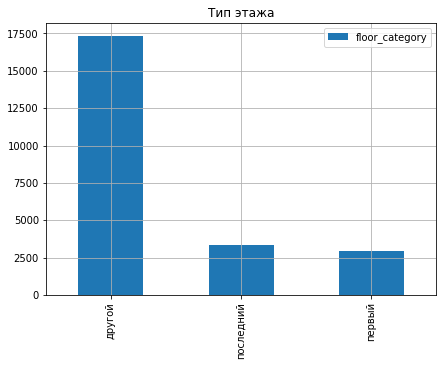

In [ ]:
# посмотрим описание данных с столбце floor методом describe()
data['floor_category'].value_counts().plot(kind='bar',grid=True, figsize=(7, 5), legend=True,title='Тип этажа');


Объектов недвижимости с типом этажей 'Первый' и 'Последний' примерно одинаковое количество, но их доля от общего числа квартир не велика.

***Общее количество этажей в доме**

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


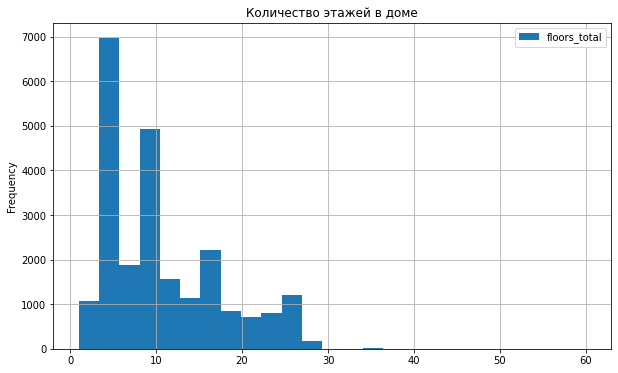

In [ ]:
# посмотрим описание данных с столбце floor_total методом describe()
print(data['floors_total'].describe())

#построим гистограмму для 'rooms'
data.plot(y='floors_total',kind='hist',bins=25, grid=True,figsize=(10,6),range=(1,60),title='Количество этажей в доме');

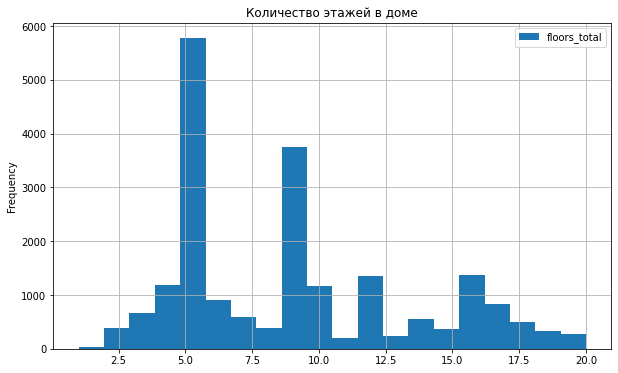

In [ ]:
floors_total_data= data.query('floors_total <= 20')
floors_total_data.plot(y='floors_total',kind='hist',bins=20, grid=True,figsize=(10,6),range=(1,20),
                       title='Количество этажей в доме');


По данным видно, что наибольшее количество предложений в домах с 5ти и 9ти этажных домах

***Расстояние до центра города в метрах**

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


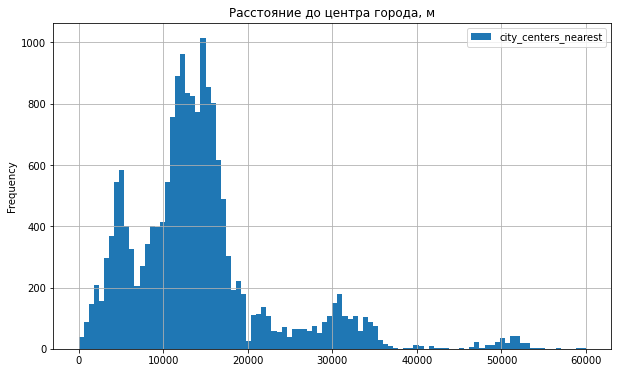

In [ ]:
#посмотрим описание данных в столбце методом describe()
print(data['city_centers_nearest'].describe())

#построим гистограмму для 'rooms'
data.plot(y='city_centers_nearest',kind='hist',bins=100, grid=True,figsize=(10,6),range=(1,60000),
          title='Расстояние до центра города, м');

Наиболешее количество вариантов расположено до 20км от центра, уберем некорректные значения\выбросы и рассмотрим данные

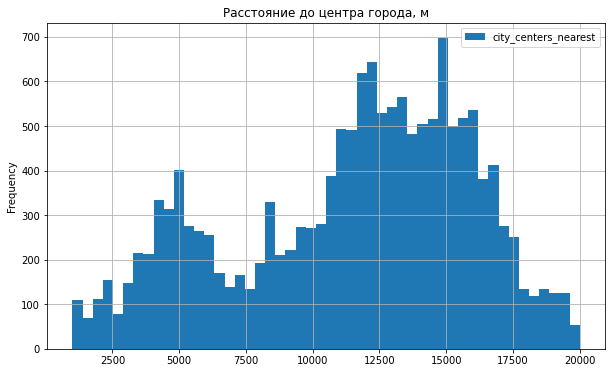

In [ ]:
city_centers_good_distance= data.query('city_centers_nearest <= 20000')
city_centers_good_distance.plot(y='city_centers_nearest',kind='hist',bins=50, grid=True,figsize=(10,6),range=(1000,20000),
                               title='Расстояние до центра города, м');


Из полученной гистограммы видим, что наибольшее количество предложений размещают в 12-15 км от центра, также приличное количество вариантов на расстоянии 5км.

***Расстояние до ближайшего парка**

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


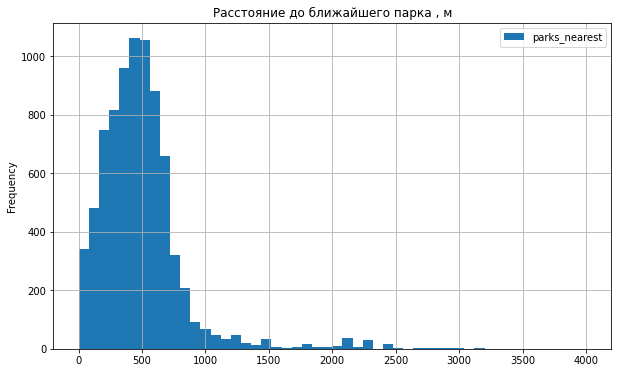

In [ ]:
#посмотрим описание данных в столбце методом describe()
print(data['parks_nearest'].describe())

data.plot(y='parks_nearest',kind='hist',bins=50, grid=True,figsize=(10,6),range=(1,4000),
          title='Расстояние до ближайшего парка , м');



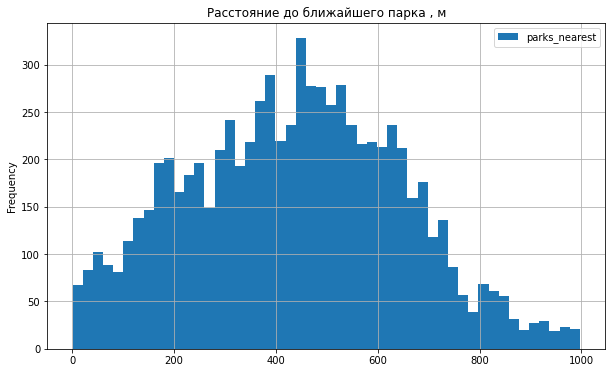

In [ ]:
parks_nearest_good_distance= data.query('parks_nearest <= 1000')
parks_nearest_good_distance.plot(y='parks_nearest',kind='hist',bins=50, grid=True,figsize=(10,6),
          title='Расстояние до ближайшего парка , м');

Можно сказать, что чаще всего парк находитсс в диапозоне 400-600 метров от объектов недвижимости

**Вывод:**\
Были изучены заданные параметры,также убрали аномальные и некорректные значения для анализа.\
Из полученных данных можно представить портрет часто встречаемого объект недвижимости -
это однокомнатная \двухкомнатная квартира  в 5 ти или 9ти этажном доме,на 2-8 этажах, средней площадью до 35кв.м., с высотой потолка 2,6м и стоимостью примерно 4,5 млн рублей

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,exposition_weekday,exposition_month,exposition_year,city_centers_nearest_km
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,...,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,18064.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,...,0.468831,490.580448,0.589900,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,14.186504
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,...,0.748403,341.572956,0.883966,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,8.621131
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,45.000000,7.656610e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,0.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


In [ ]:
#выведем количество уникальных значений высоты потолка и сами значения
print('Количество уникальных значений высоты потолка:',len(data['ceiling_height'].unique()))
data['ceiling_height'].unique()


Количество уникальных значений высоты потолка: 183


array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Есть версия,что в значениях более 20 метров пользователь ошибся и забыл поставить разделительный знак. \
Выходит, что значение в 20,25,32м и др мы можем заменить на корректные. 2.0,2.5,3.2 и т.д.\
Для начала посмотрим только на строки с аномально высокими значениями потолков - более 20м

In [ ]:
#посмотрим на срез данных с аномальной высотой потолков
high_ceiling = data.query('ceiling_height> 20')
high_ceiling

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,NaN,0,NaN,259.0,65217.4,3,7,2018,другой,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,NaN,0,NaN,NaN,38666.7,0,11,2018,другой,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,658.0,1,331.0,181.0,95555.6,3,2,2018,другой,13.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,NaN,0,NaN,28.0,120000.0,2,9,2017,другой,NaN
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,397.0,1,578.0,7.0,126229.5,2,10,2018,первый,8.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,NaN,0,NaN,540.0,46296.3,4,10,2017,другой,NaN
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,305.0,0,NaN,267.0,88000.0,1,8,2017,другой,11.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,NaN,3,80.0,38.0,101875.0,2,1,2019,другой,20.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,...,417.0,2,73.0,NaN,74324.3,0,3,2019,последний,51.0
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,NaN,0,NaN,NaN,94047.6,6,3,2017,другой,14.0


Всего 22 строки с высотой потолка более 20м \
Смотря на выведенные данные, соотношение площади, стоимости соответствует реальным данным.
Попробуем написать цикл, который передвинет разделительный знак  и посмотрим какие изменения увидим в общей картине.


In [ ]:
for index,row in  data.iterrows():
    value = row['ceiling_height']
    if not pd.isnull(value) and value >= 20.0:
        data.at[index,'ceiling_height'] = value *0.1

print('Количество уникальных значений высоты потолка:',len(data['ceiling_height'].unique()))

Количество уникальных значений высоты потолка: 177


In [ ]:
#посмотрим обновленнные уникальные значения по столбцу
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  2.4 ,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [ ]:
#выведем опиательные данные по столбцу и посмотрим как изменились медианное и среднее значение
data['ceiling_height'].describe()


count    23565.000000
mean         2.698746
std          0.253630
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

Мы видим, что после внесенных изменений в столбец, медианное значение столбца 'ceiling_height' по прежнему осталось - 2.65м, а вот среднее немного изменилось  и стало 2.69м(что логично, ботолки в 100м исчезли)

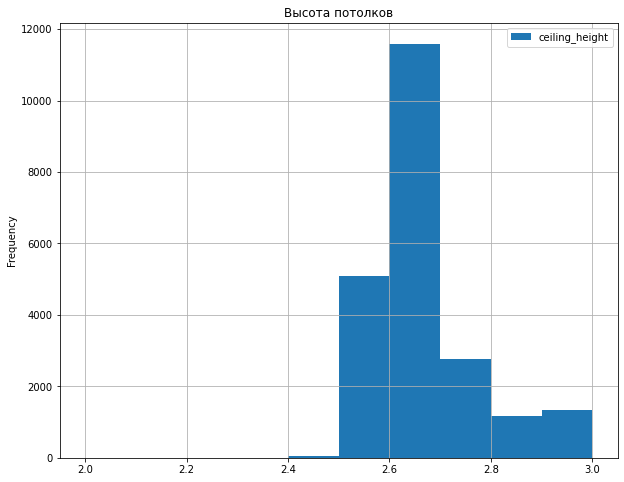

In [ ]:
data.query('ceiling_height < 8 and ceiling_height >= 2.4').plot(y='ceiling_height',kind='hist',bins=10,
                         grid=True,figsize=(10,8),range=(2,3),title='Высота потолков');




<div class="alert alert-info"> <b>Комментарии студента:</b>
    
По итогу обработки аномалий высоты потолков можно сделать вывод: \
мы очистили данные столбца от выбросов, но на общую картину это не сильно повлияло, вероятно причиной является небольшое кол-во строк с аномальными значениями  -  всего 22.

# 4.2 Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
*Постройте гистограмму.
Посчитайте среднее и медиану.\
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?*

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


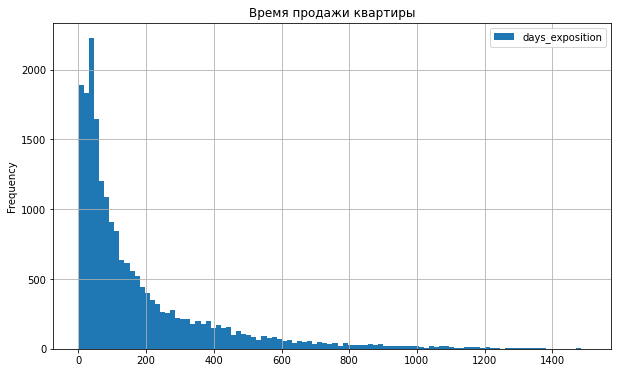

In [ ]:
#посмотрим описание данных о времени продажи квартиры, посомтрим на среднее и медиану, затем  построим гистограмму
print(data['days_exposition'].describe())

data.plot(y='days_exposition',kind='hist',bins=100, grid=True,figsize=(10,6),range=(1,1500),
          title='Время продажи квартиры');


По данным мы видим что медианное значение продажи квартиры - 95 дней, среднее значение - 181 день, а также большое количество выбросов которые влияют на общую картину. Ограничим данные до 150 дней и построим гистограмму

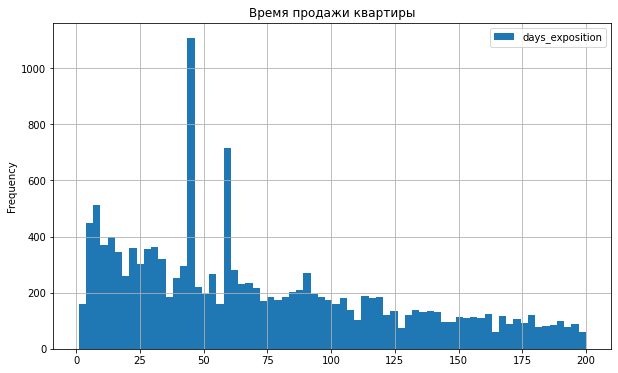

In [ ]:
days_exposition_mid = data.query('days_exposition < 200')

days_exposition_mid.plot(y='days_exposition',kind='hist',bins=70, grid=True,figsize=(10,6),range=(1,200),
                         title='Время продажи квартиры');


Исходя из графика, можно сделать выводб что больше всего квартиры продовались в интервале 45-65 дней, но также заметен большой хвост. Можно предположить, что эти всплески, срок когда объявление автоматически закрывается изза отсутствия интереса к объекту, или это очень выгодные варианты которые быстро забирают. В целом выбросы также имеют место быть, построим диаграмму размаха, чтобы рассмотреть наглядно наиболее подходящие данные и посмотрим какие данные мы точно можем удалить из анализируемой таблицы

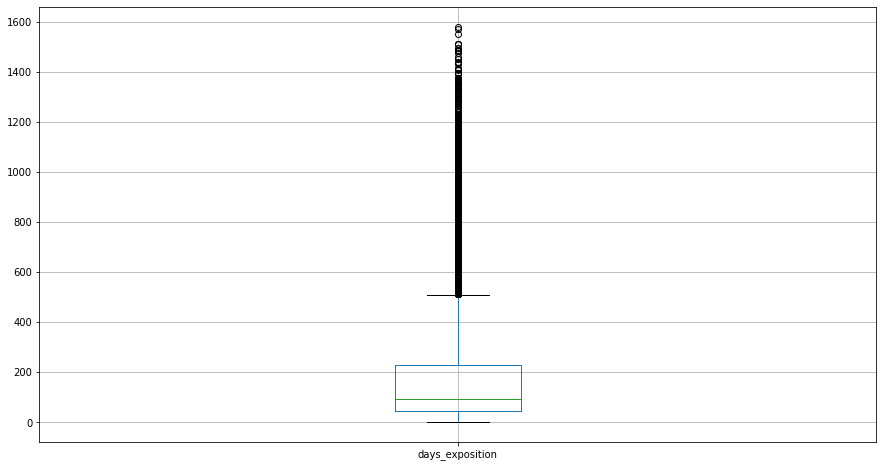

In [ ]:
data.boxplot(column='days_exposition', figsize=(15, 8));

Можно сказать, что объявления сроком более 500 дней являются выбросами\
для того, чтобы мы могли отбросить данные, нам нужно точное значение, поэтому рассчитаем значения 1 и 3 квартилей, затем межквартильного размаха

In [ ]:
#рассчитаем точное значение верхнего уса диаграммы размаха
qr1 = data['days_exposition'].quantile(.25) # первый квартиль
qr3 = data['days_exposition'].quantile(.75) # третий квартиль
iqr = qr3 - qr1 #межквартильный размах

qr_high = qr3 + 1.5 * iqr
qr_high

510.0

In [ ]:
len(data)

23565

In [ ]:
#освободим дадафрейм от выбросов и обновим данные через новую переменную
data_upd = data.query('days_exposition < 510')
len(data_upd)

18721

**Вывод:**\
Проанализировав данные о времени продажи квартир можно сказать:\
-объявления от 45 до 231 дней можем считать нормальным временем продажи недвижимости\
-объявления до 45 дней, это черезвычайно быстрые продажи\
-объявления от 231 до 510 дней  можно считать долгой продажей \
-объявления висевшие более 510 дней  являются выбросом\

Новую переменную *data_upd* можем использовать в дальнейшем исследовании.

# 4.3 Определите факторы которые больше всего влияют на общую(полную) стоимость объекта

Изучите, зависит ли цена от:

общей площади;\
жилой площади;\
площади кухни;\
количества комнат;\
этажа, на котором расположена квартира (первый, последний, другой);\
даты размещения (день недели, месяц, год).


In [ ]:
#посчитаем коэффициент корреляции по параметрам
# в новую переменную офильтруем данные без выбросов, для наглядности диаграмм
data_upd_2 = data_upd.query('last_price<12000000 & total_area <115 & living_area <78 ')
#создадим список столбцов с которыми нас интересует наличие зависимости (тип этажа рассмотрим отдельно,тип данных отличается)
list_factors = ['total_area','living_area','kitchen_area','rooms', 'exposition_weekday','exposition_month',
                'exposition_year']
#напишем цикл который посчитает коэффициент корреляции для всех перечисленных факторов
for factor in list_factors:
    correlation = data_upd_2['last_price'].corr(data_upd_2[factor]).round(2)
    print((f'Корреляция между last_price и {factor} составляет: {correlation}'))


Корреляция между last_price и total_area составляет: 0.71
Корреляция между last_price и living_area составляет: 0.57
Корреляция между last_price и kitchen_area составляет: 0.48
Корреляция между last_price и rooms составляет: 0.45
Корреляция между last_price и exposition_weekday составляет: -0.01
Корреляция между last_price и exposition_month составляет: 0.0
Корреляция между last_price и exposition_year составляет: 0.01


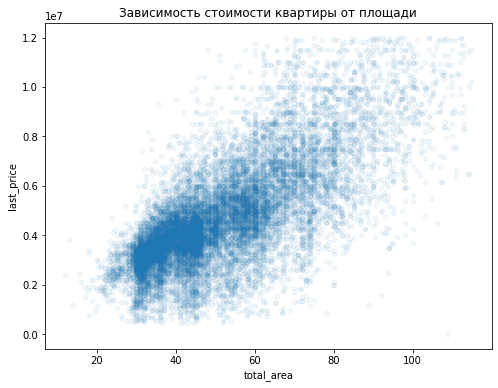

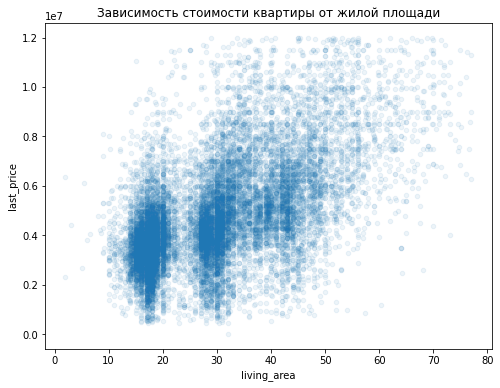

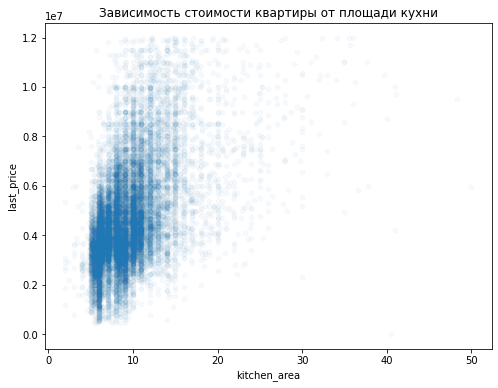

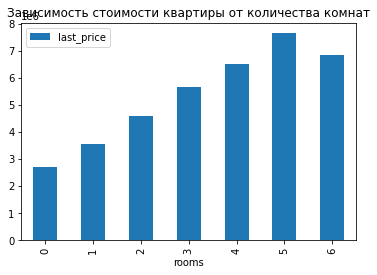

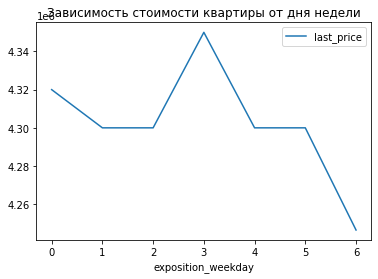

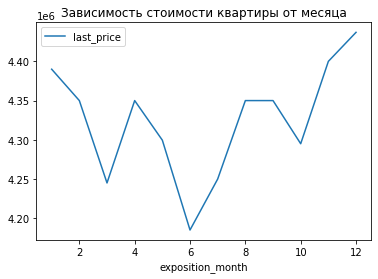

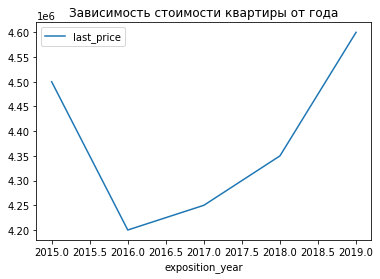

In [ ]:
#построим графики зависимости 'last_price' c параметрами
data_upd_2.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.06,
              title='Зависимость стоимости квартиры от площади')
data_upd_2.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.08,
              title='Зависимость стоимости квартиры от жилой площади')
data_upd_2.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03,
              title='Зависимость стоимости квартиры от площади кухни')

#построим столбчатый график для анализа зависимости стоимости от количества комнат
data_upd_2.pivot_table(index='rooms',values='last_price',aggfunc='median').plot(y='last_price', kind='bar',
                                                             title='Зависимость стоимости квартиры от количества комнат')

#построим лийнейные графики для анализа зависимости стоимости от дня,недели, месяца и года
data_upd_2.pivot_table(index='exposition_weekday',values='last_price',aggfunc='median').plot(y='last_price',kind='line',
                                                                                             title='Зависимость стоимости квартиры от дня недели')
data_upd_2.pivot_table(index='exposition_month',values='last_price',aggfunc='median').plot(y='last_price',
                                                                                        kind='line', title='Зависимость стоимости квартиры от месяца')
data_upd_2.pivot_table(index='exposition_year',values='last_price',aggfunc='median').plot(y='last_price',
                                                                                        kind='line',title='Зависимость стоимости квартиры от года');

**Отдельно посмотрим зависимость полной стоимости и группировки по этажам**

                        mean  count     median
floor_category                                
другой          6.212987e+06  13937  4650000.0
первый          4.439036e+06   2236  3790000.0
последний       6.837124e+06   2548  4200000.0


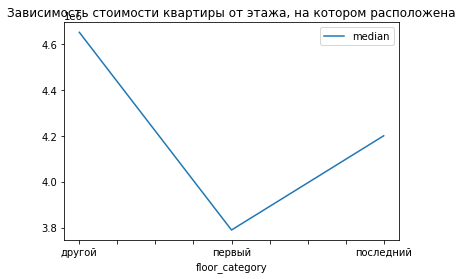

In [ ]:
#создадим сводную таблицу
floor_category_corr = data_upd.pivot_table(index = 'floor_category', values = 'last_price',
                                             aggfunc = ['mean', 'count', 'median'])
#убираем двухуровневое наименование колонок
floor_category_corr.columns = ['mean', 'count', 'median']
print(floor_category_corr)
floor_category_corr.plot(y = 'median', legend=True,title='Зависимость стоимости квартиры от этажа, на котором расположена');


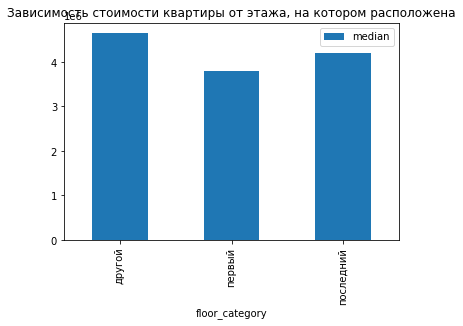

In [ ]:
#построим  столбчатую диаграмму на основе ранее сгрппированных данных
floor_category_corr.plot(y='median', kind='bar',title='Зависимость стоимости квартиры от этажа, на котором расположена');

**-Зависимость стоимости квартиры от площади**  прямопропорциональная, чем больше площадь- тем выше стоимость объекта.
по графику видно, что больше всего предложений в ценовом диапозоне от 2,5 до 6 млн.руб с площадь от 30кв м до 60 кв.м. \

**-Зависимость стоимости квартиры от жилой площади** менее явная но также прямопропорциональная, с увеличением жилой площади - увеличивается стоимость.

**-Зависимость стоимости квартиры от плоащди кухни** также не так явно выражена как с общей площью, но имеется. ПО графику видно что больше всего объявлений  с площадью кухни до 20 кв.м.

**-Зависимость стоимости квартиры от количества комнат**  есть, но не большая.Интересно, что стоимость квартир  1-3 комнатами и даже немного четырься местами держатся в одном ценовом сегмете, возможно тут важную роль в этом случаее играет именно общая площадь квартиры, посколько в домах старого фонда часто встречаются квартиры с большим количеством комнат небольшого размера.

**-Зависимость полной стоимости и даты размещения(в какой день недели, месяц, год)** отсутствует, что мы видим по коэффициенту корреляции и на представленных графиках.
**-О зависимости полной стоимости и типа этажа** можно сказать,что квартиры на первом и последнем этажах стоят дешевле, чем на остальных. Наименьшее медианное значение стоимости у квартир на первом этаже.

**Вывод:**\
На основании проведенного анализа можно сделать вывод, что на общую стоимость объекта недвижимости больше всего влияют факторы общей и жиой площади, в меньшей степени площадь кухни и  количество комнат
Зависимость полной стоимости между днем недели, месяцем и годом отсутствует,коэффициент корреляции нулевой или отрицательный.

# 4.4 Посчитайте среднюю цену 1 кв. м в 10 населенных пунктах с наибольшим числом объявлений

In [ ]:
#создадим переменную в которой выведем топ-10 населенных пунктов
top_10_localities = data_upd['locality_name'].value_counts(ascending=False).head(10)
top_10_localities.head(10)

Санкт-Петербург      12413
Мурино                 514
Кудрово                405
поселок Шушары         387
Всеволожск             308
Колпино                294
поселок Парголово      288
Пушкин                 278
Гатчина                244
Выборг                 193
Name: locality_name, dtype: int64

In [ ]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10_localities_result = data_upd.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_square_meter')
top_10_localities_result.sort_values(by='price_square_meter', ascending=False).round(2)

,price_square_meter
locality_name,
Санкт-Петербург,111770.28
Пушкин,101894.61
Кудрово,94490.06
поселок Парголово,89162.89
Мурино,85909.00
поселок Шушары,77769.60
Колпино,74748.68
Всеволожск,68605.62
Гатчина,68065.18


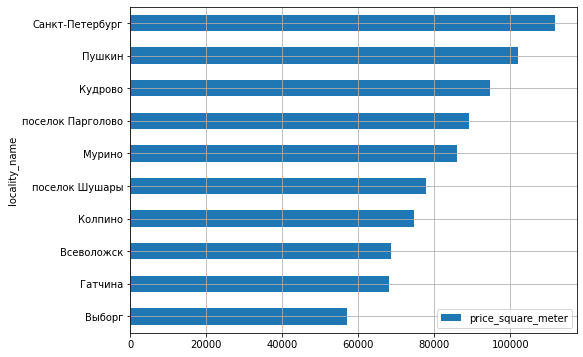

In [ ]:
# выведем информацию на графике типа 'barh' среднюю цену квадратного метра в топ 10 населенных пунктах

top_10_localities_result.sort_values(by='price_square_meter').plot(kind='barh', legend=True, grid=True, figsize=(8, 6),
                                                                   label='Средняя цена за кв.м. в ТОП-10 населенных пунктах');

**Вывод:**\
Cамая дорогие предложения объектов недвижимости **в Санкт-Петербурге** - cредняя стоимость 111770р за кв.м.\
Следом в рейтинге **Пушкин** - 101894р за кв.м.(это довольно спокойный город, не сильно отдален от Санкт-петербурга, с кучей парков и не высокими застройками)\
Кудрово, Паролово, Мурино и Шушары находся на окраинах города, с большим количеством предложений и большим спросом\

Наименьшая стоимость за кв.м. в **Выборге** - 57011р, вероятно это обосновано удаленностью города, но в тоже время там также много парков, развитая инфроструктура, поэтому он входит в топ.

# 4.5 Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [ ]:
#оставим объявления только в СПб
data_spb = data_upd.query('locality_name == "Санкт-Петербург"')
len(data_spb)

12413

In [ ]:
#Посмотрим среднюю стоимость квартир в СПБ в зависимости от близости к центру
data_spb.pivot_table(index='city_centers_nearest_km', values='price_square_meter').round(2)

,price_square_meter
city_centers_nearest_km,
0.0,199277.98
1.0,166147.97
2.0,159061.64
3.0,116233.14
4.0,132891.45
5.0,137644.86
6.0,147397.24
7.0,144818.21
8.0,123284.37


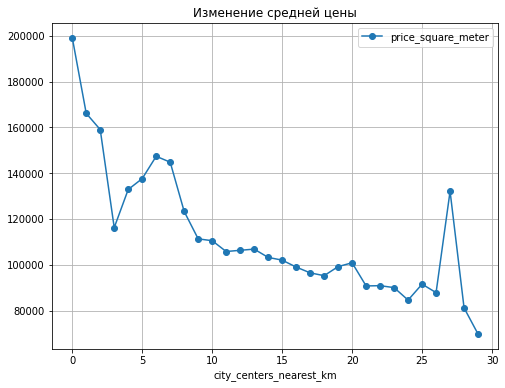

In [ ]:
data_spb.pivot_table(index='city_centers_nearest_km', values='price_square_meter').plot(marker='o',
                                                                                        grid=True, figsize=(8, 6),
                                                                                        title='Изменение средней цены');


**Вывод:**\
Из графика видно, что объекты недвижимости в центре и  до 1км - с максимальной стоимостью недвиживости (199277р./кв.м.)о, но в целом на расстоянии 1-2 км цены выше, видим линейное снижение цены после 8км от центра.
Внезапный всплеск цены на расстоянии 27км от центра возможен из-за класса недвижимости
Можем сказать что зависимость стоимости от близости к центру есть

# 5. Напишите общий вывод

В проекте были исследованы данные из архива объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах  за несколько лет.

• Проведено ознакомление и предобработка данных. В дадасете были  обработаны все  возможные пропуски, заменен тип данных, наименование столбцов приведено к одному виду.

• Добавлены новые столцы для  удобвста проведения дальнейшего исследования:\
-цена одного квадратного метра - price_square_meter;\
-день недели публикации объявления - exposition_weekday;\
-месяц публикации объявления - exposition_month;\
-год публикации объявления- exposition_year;\
-тип этажа квартиры - floor_category(;\
-расстояние до центра города в километрах - city_centers_nearest_km.


Исследовательский анализ данных показал, что **наибольшее влияние на стоимость объектов недвижимости оказывает общая площадь объекта**.(Чем больше площадь квартиры, тем выше стоимость).\
Также на цену влияет  расстояния до центра города, стоимость 1 кв м квартиры в 1-2х километрах от центра заметно дороже.\
В меньшей степени оказывают влияние количество комнат


В процессе анализа выяснили: \
*Из топ-10 населенных пункотов по количеству объявлений\
 -Средня рыночная стоимость 1 кв.м. в Санкт- Петербурге самая высокая - 111770р\

 -Самая низкая средня стоимость за 1 кв.м.  в Выборге  - 57011р.\

*В среднем нормальным временем продажи недвидимости можем считать срок от 45 до 231 дней(от 1,5 до 7,5 месяцев)